In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

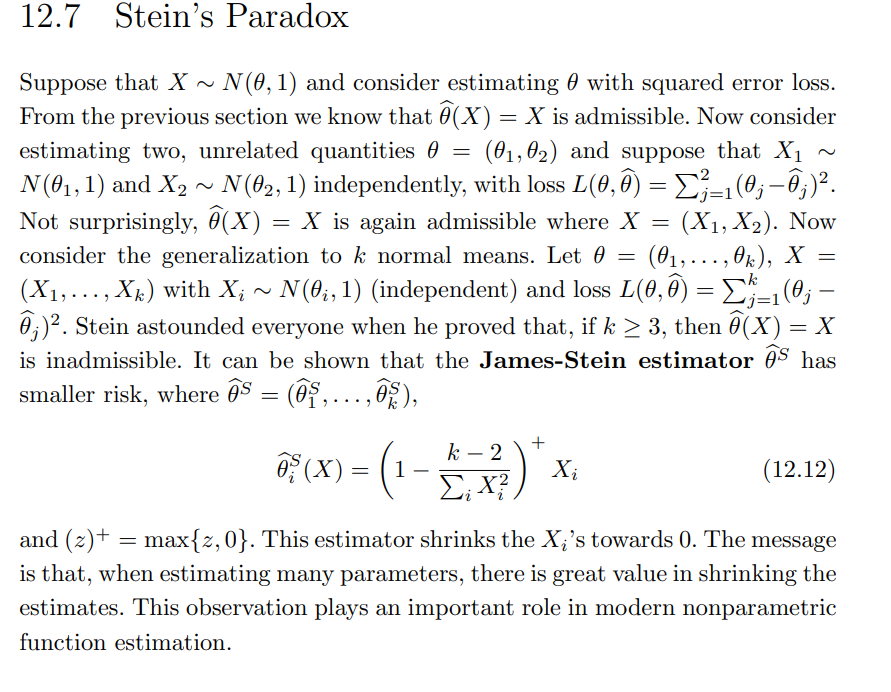

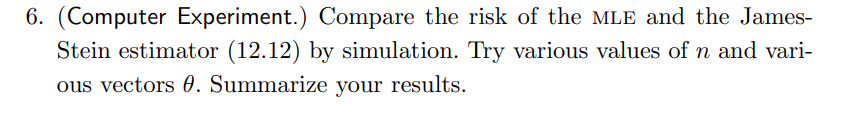

In [54]:
def mse(thetahat, theta):
    return np.mean((thetahat - theta) ** 2, axis=0)

def stein_estimates(X, theta):
    k = len(X)
    factors = np.maximum(0, 1 - (k - 2) / np.sum(X ** 2, axis=0))
    thetahat = factors * X
    return thetahat

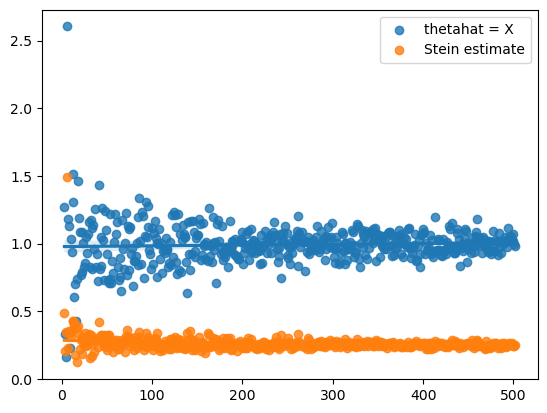

In [65]:
kmax = 500
N=1

stein_losses = np.empty((kmax, N))
x_losses = np.empty((kmax, N))

for k in range(3, kmax + 3):
    theta = np.random.uniform(low = -1, high = 1, size = (k,1))
    #theta = 1
    X = np.random.randn(k, N) + theta

    steinests = stein_estimates(X, theta)
    
    x_losses[k-3,:] = mse(X, theta)
    stein_losses[k-3,:] = mse(steinests, theta)

ks = np.arange(3, kmax + 3)

sns.regplot(x=ks, y=x_losses, label='thetahat = X')
sns.regplot(x=ks, y=stein_losses, label='Stein estimate')
plt.legend()
plt.show()

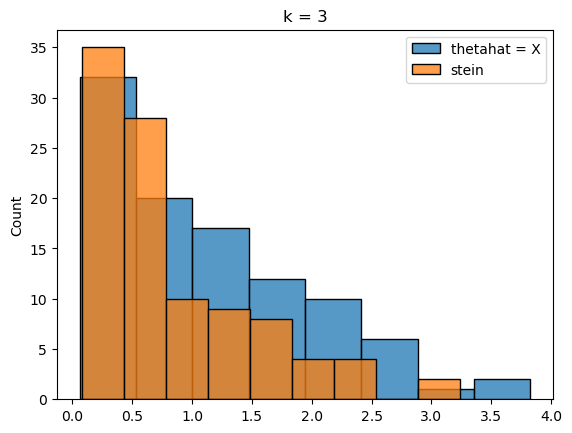

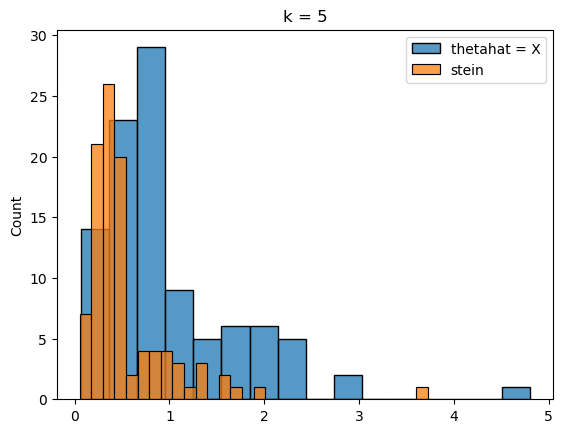

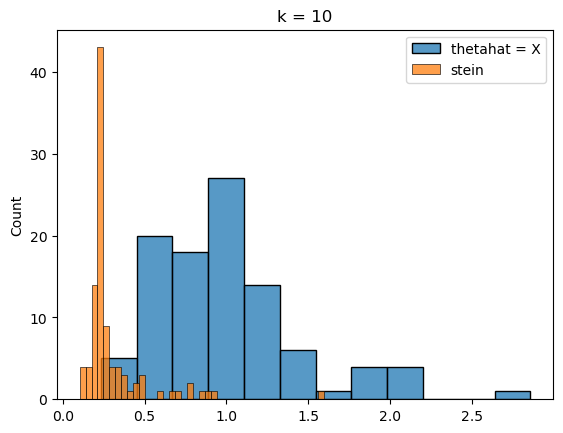

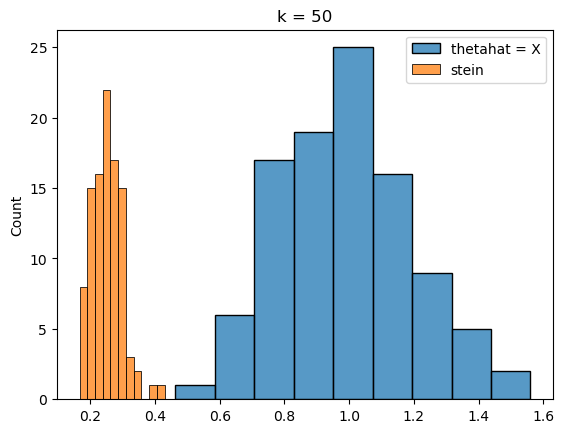

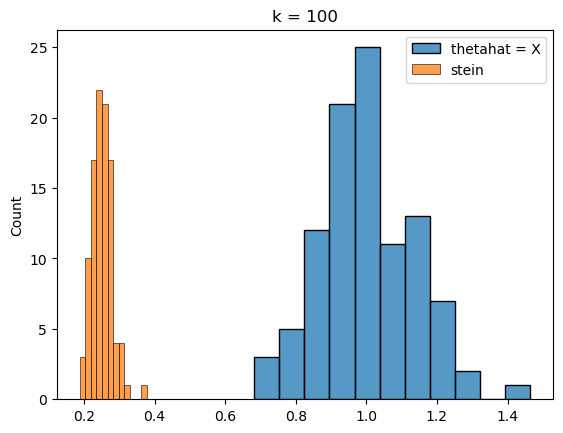

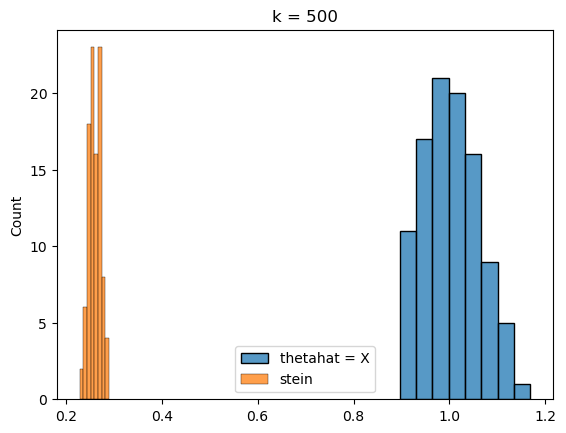

In [68]:
ks = [3, 5, 10, 50, 100, 500]
N=100

for k in ks:
    theta = np.random.uniform(low = -1, high = 1, size = (k,1))
    X = np.random.randn(k, N) + theta

    steinests = stein_estimates(X, theta)
    xloss = mse(X, theta)
    steinloss = mse(steinests, theta)

    sns.histplot(xloss, label='thetahat = X')
    sns.histplot(steinloss, label='stein')
    plt.title('k = ' + str(k))
    plt.legend()
    plt.show()
